# Import Library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import smogn

# Data Loading

In [2]:
data = pd.read_csv('GelombangAbrasi - a22.csv')

# EDA

In [3]:
data.dtypes

ID Desa                                 int64
Desa                                   object
Kecamatan                              object
Rendah                                float64
Sedang                                float64
Tinggi                                float64
Kelas                                  object
Luas Wilayah (Km2)                    float64
Jarak ke Ibu Kota Kabupaten (km)        int64
Jumlah Penduduk                         int64
Kepadatan Penduduk                    float64
Perempuan                               int64
Usia Lansia (60 ke atas)                int64
Usia Anak (0-14 tahun)                  int64
Ibu Hamil                             float64
Tingkat Pendidikan (SMA/sederajat)      int64
Penduduk Terpapar                       int64
dtype: object

In [4]:
data['Luas Wilayah (Ha)'] = data['Luas Wilayah (Km2)']*100

In [5]:
data['Luas Terdampak (Ha)'] = data['Rendah']+data['Sedang']+data['Tinggi']

In [6]:
data['Presentase Luasan Terdampak'] = (data['Luas Terdampak (Ha)']/data['Luas Wilayah (Ha)'])*100

In [7]:
data.head(2)

,ID Desa,Desa,Kecamatan,Rendah,Sedang,Tinggi,Kelas,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar,Luas Wilayah (Ha),Luas Terdampak (Ha),Presentase Luasan Terdampak
0,6101032001,Sarang Burung Danau,Jawai,0.0,3.61,55.31,Tinggi,48.20,62,5862,122.0,2869,424,1655,104.0,374,266,4820.0,58.92,1.222407
1,6101032002,Sungai Nilam,Jawai,0.0,11.00,1.29,Sedang,18.05,57,2407,133.0,1184,172,636,44.0,147,0,1805.0,12.29,0.680886


## Menghapus Atribut yang Tidak Digunakan

In [8]:
df = data.drop(['ID Desa','Desa','Kecamatan','Rendah','Sedang','Tinggi','Kelas','Luas Wilayah (Km2)'], 
               axis=1)

In [9]:
df.head(2)

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar,Luas Wilayah (Ha),Luas Terdampak (Ha),Presentase Luasan Terdampak
0,62,5862,122.0,2869,424,1655,104.0,374,266,4820.0,58.92,1.222407
1,57,2407,133.0,1184,172,636,44.0,147,0,1805.0,12.29,0.680886


## Menangani Missing Value

In [10]:
df['Ibu Hamil'] = df['Ibu Hamil'].fillna(df['Ibu Hamil'].mean())

In [11]:
X = df.drop(['Luas Terdampak (Ha)','Presentase Luasan Terdampak'], axis=1)
y = df['Presentase Luasan Terdampak']

## Distribusi dan Statistik Data

array([[<AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>,
        <AxesSubplot:title={'center':'Kepadatan Penduduk'}>],
       [<AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>,
        <AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>],
       [<AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>,
        <AxesSubplot:title={'center':'Penduduk Terpapar'}>],
       [<AxesSubplot:title={'center':'Luas Wilayah (Ha)'}>,
        <AxesSubplot:title={'center':'Luas Terdampak (Ha)'}>,
        <AxesSubplot:title={'center':'Presentase Luasan Terdampak'}>]],
      dtype=object)

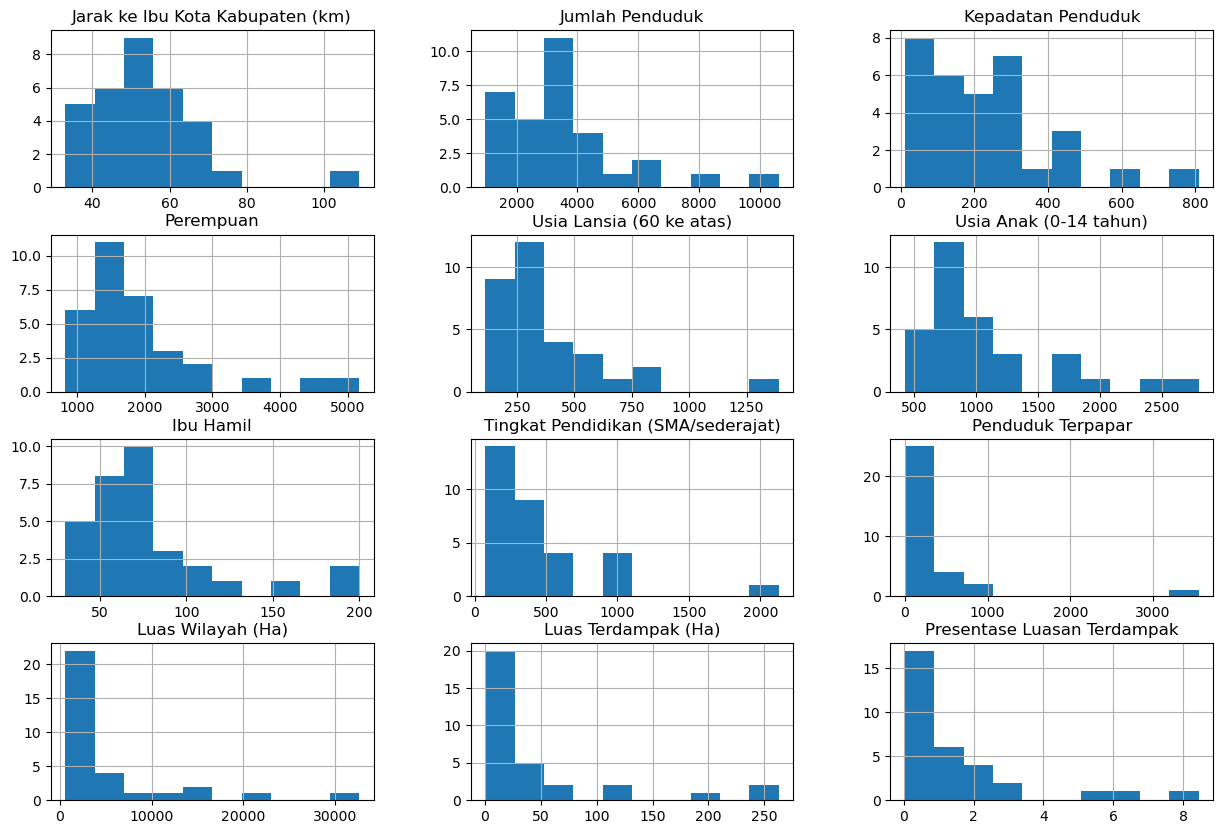

In [12]:
df.hist(figsize=(15,10))

In [13]:
df.skew()

Jarak ke Ibu Kota Kabupaten (km)      1.931120
Jumlah Penduduk                       1.732613
Kepadatan Penduduk                    1.263804
Perempuan                             1.990204
Usia Lansia (60 ke atas)              2.284582
Usia Anak (0-14 tahun)                1.666060
Ibu Hamil                             1.811442
Tingkat Pendidikan (SMA/sederajat)    2.596189
Penduduk Terpapar                     4.476472
Luas Wilayah (Ha)                     2.604752
Luas Terdampak (Ha)                   2.275535
Presentase Luasan Terdampak           2.342260
dtype: float64

In [14]:
df.describe()

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar,Luas Wilayah (Ha),Luas Terdampak (Ha),Presentase Luasan Terdampak
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,53.343750,3465.718750,225.824688,1928.593750,375.218750,1080.281250,78.400000,448.875000,246.625000,4891.156250,46.296250,1.462847
std,14.113844,2027.427867,184.758076,1007.720995,258.033848,563.429775,39.994032,409.274476,653.660055,7211.400701,69.627417,1.899919
min,33.000000,970.000000,12.000000,829.000000,112.000000,426.000000,30.000000,74.000000,0.000000,600.000000,0.390000,0.032500
25%,45.750000,2188.750000,95.250000,1379.250000,197.750000,727.500000,55.750000,229.750000,0.000000,1082.500000,9.912500,0.287757
50%,52.000000,3158.000000,208.000000,1634.500000,330.000000,888.000000,71.500000,315.500000,8.000000,1790.000000,21.400000,0.743343
75%,57.250000,4088.500000,297.750000,2045.250000,431.250000,1228.000000,86.000000,521.500000,148.250000,4993.250000,41.140000,1.853581
max,109.000000,10615.000000,809.000000,5169.000000,1390.000000,2796.000000,200.000000,2129.000000,3551.000000,32621.000000,262.860000,8.446373


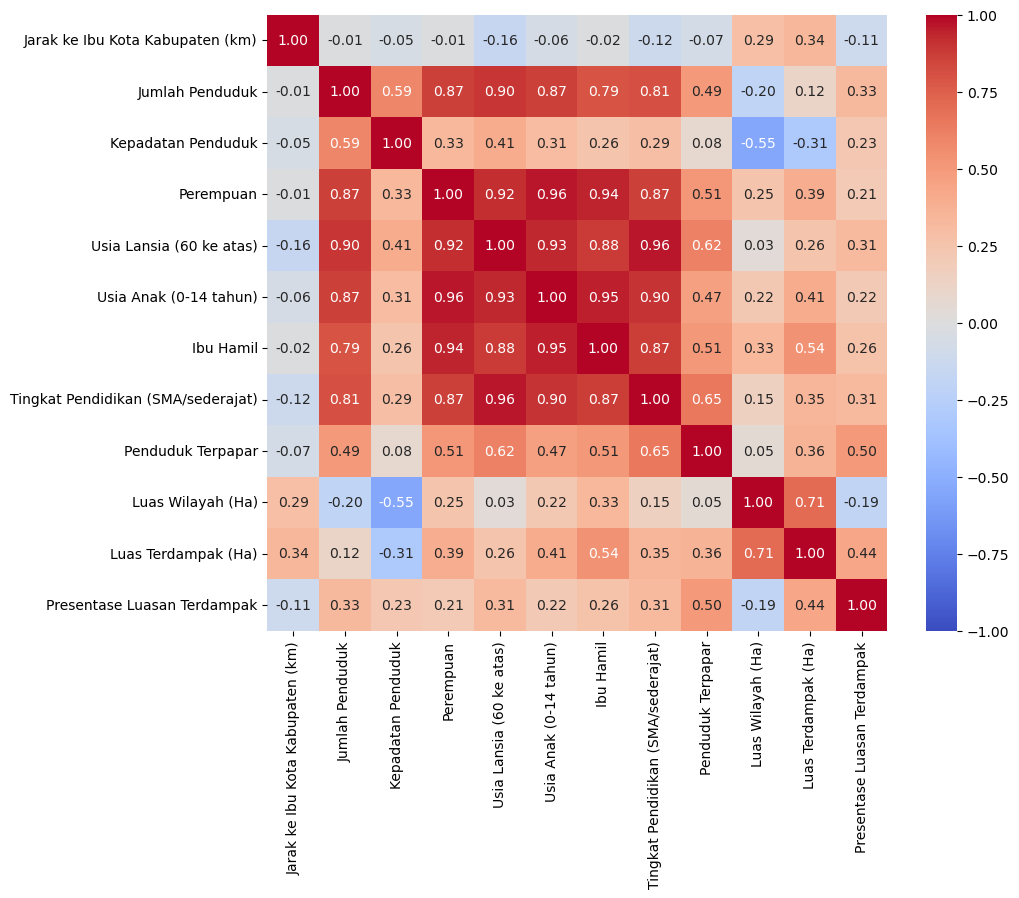

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

Atribut dengan korelasi tertinggi pada Penduduk Terdampar adalah sebagai berikut:
* Tingkat Pendidikan (SMA/sederajat)
* Usia Lansia (60 ke atas)
* Ibu Hamil
* Perempuan
* Presentase Luasan Terdampak
* Jumlah Penduduk

In [16]:
corr_atr = ['Tingkat Pendidikan (SMA/sederajat)', 'Usia Lansia (60 ke atas)','Ibu Hamil',
            'Perempuan','Presentase Luasan Terdampak','Jumlah Penduduk','Penduduk Terpapar']
df[corr_atr].corr()

,Tingkat Pendidikan (SMA/sederajat),Usia Lansia (60 ke atas),Ibu Hamil,Perempuan,Presentase Luasan Terdampak,Jumlah Penduduk,Penduduk Terpapar
Tingkat Pendidikan (SMA/sederajat),1.000000,0.962957,0.869983,0.866065,0.312813,0.806442,0.651579
Usia Lansia (60 ke atas),0.962957,1.000000,0.875194,0.915779,0.312793,0.895645,0.616231
Ibu Hamil,0.869983,0.875194,1.000000,0.944076,0.263423,0.789679,0.505616
Perempuan,0.866065,0.915779,0.944076,1.000000,0.207444,0.866377,0.511974
Presentase Luasan Terdampak,0.312813,0.312793,0.263423,0.207444,1.000000,0.326505,0.497011
Jumlah Penduduk,0.806442,0.895645,0.789679,0.866377,0.326505,1.000000,0.493011
Penduduk Terpapar,0.651579,0.616231,0.505616,0.511974,0.497011,0.493011,1.000000


In [17]:
df.columns

Index(['Jarak ke Ibu Kota Kabupaten (km)', 'Jumlah Penduduk',
       'Kepadatan Penduduk', 'Perempuan', 'Usia Lansia (60 ke atas)',
       'Usia Anak (0-14 tahun)', 'Ibu Hamil',
       'Tingkat Pendidikan (SMA/sederajat)', 'Penduduk Terpapar',
       'Luas Wilayah (Ha)', 'Luas Terdampak (Ha)',
       'Presentase Luasan Terdampak'],
      dtype='object')

In [18]:
df1 = df.drop(['Penduduk Terpapar', 'Luas Terdampak (Ha)'], axis=1)
df2 = df.drop(['Luas Terdampak (Ha)', 'Presentase Luasan Terdampak'], axis=1)

## Menangani Imbalanced Data dengan SMOGN

In [19]:
#smogn
cleaned = smogn.smoter(data=df1, y="Presentase Luasan Terdampak")
cleaned2 = smogn.smoter(data=df2, y="Penduduk Terpapar")

synth_matrix: 100%|##########| 8/8 [00:00<00:00, 432.72it/s]


In [20]:
cleaned.shape

(24, 10)

In [21]:
cleaned.columns

Index(['Jarak ke Ibu Kota Kabupaten (km)', 'Jumlah Penduduk',
       'Kepadatan Penduduk', 'Perempuan', 'Usia Lansia (60 ke atas)',
       'Usia Anak (0-14 tahun)', 'Ibu Hamil',
       'Tingkat Pendidikan (SMA/sederajat)', 'Luas Wilayah (Ha)',
       'Presentase Luasan Terdampak'],
      dtype='object')

In [22]:
cleaned2.shape

(24, 10)

In [23]:
cleaned2.columns

Index(['Jarak ke Ibu Kota Kabupaten (km)', 'Jumlah Penduduk',
       'Kepadatan Penduduk', 'Perempuan', 'Usia Lansia (60 ke atas)',
       'Usia Anak (0-14 tahun)', 'Ibu Hamil',
       'Tingkat Pendidikan (SMA/sederajat)', 'Penduduk Terpapar',
       'Luas Wilayah (Ha)'],
      dtype='object')

# Memisahkan Input Data dan Data Target

In [24]:
X_c1 = cleaned.drop(['Presentase Luasan Terdampak'], axis=1)
y_c1 = cleaned['Presentase Luasan Terdampak']

In [25]:
X_c2 = cleaned2.drop(['Penduduk Terpapar'], axis=1)
y_c2 = cleaned2['Penduduk Terpapar']

## Model Simple Linear Regression

In [26]:
simple1c = LinearRegression().fit(X_c1, y_c1)
simple2c = LinearRegression().fit(X_c2, y_c2)

In [27]:
simple1c.score(X_c1, y_c1)

0.5110072388262328

In [28]:
simple2c.score(X_c2, y_c2)

0.9097579154666984

In [39]:
y_pred = simple2c.predict(X_c2)

## Model XGBoost

In [29]:
xgb1c = xgb.XGBRFRegressor(random_state=42).fit(X_c1, y_c1)
xgb2c = xgb.XGBRFRegressor(random_state=42).fit(X_c2, y_c2)

In [30]:
xgb1c.score(X_c2, y_c2)

0.9435254753702711

In [31]:
xgb2c.score(X_c2, y_c2)

0.9953184839601651

* Linear = 0.2820106973659472
* XGBoost = 0.9457338921072093

In [32]:
y_predd = xgb2c.predict(X_c2)

# Clustering Data Presentase Luasan Terdampak

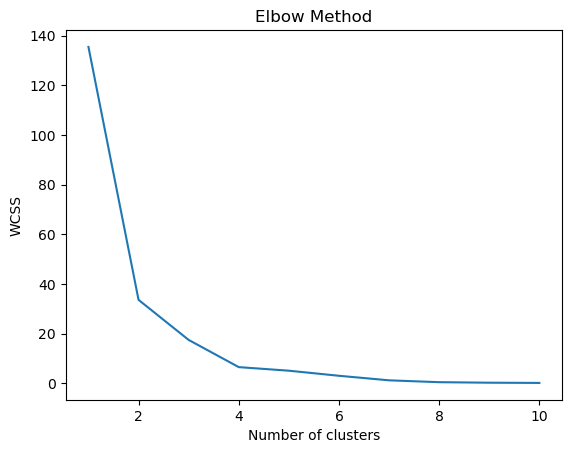

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

klaster = cleaned[['Presentase Luasan Terdampak']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(klaster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Nilai cluster terbaik berada pada angka 2

In [34]:
kmeans = KMeans(n_clusters=2, random_state=42)
cleaned['Cluster'] = kmeans.fit_predict(klaster)

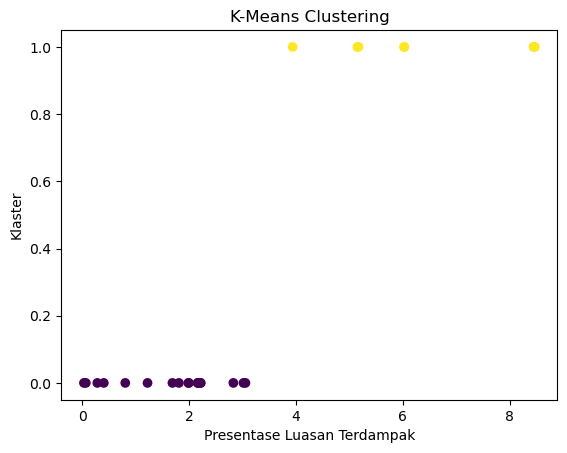

In [35]:
plt.scatter(cleaned['Presentase Luasan Terdampak'], cleaned['Cluster'], c=cleaned['Cluster'], cmap='viridis')
plt.xlabel('Presentase Luasan Terdampak')
plt.ylabel('Klaster')
plt.title('K-Means Clustering')
plt.show()

* Presentase Luasan Terdampak yang kurang dari

In [36]:
cleaned

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Luas Wilayah (Ha),Presentase Luasan Terdampak,Cluster
0,64.0,4855.0,810.303143,2354.0,499.0,1265.0,100.077436,562.0,597.275756,1.996731,0
1,33.0,3670.0,64.537620,1752.0,558.0,1650.0,127.535403,1006.0,5509.255427,2.163804,0
2,46.0,3219.0,293.969190,1506.0,490.0,1250.0,57.115869,600.0,1116.088106,2.209830,0
3,45.0,3482.0,401.928852,1719.0,396.0,922.0,66.181617,473.0,873.017019,3.939179,1
4,66.0,3137.0,257.364192,1538.0,272.0,795.0,64.506668,372.0,1240.397317,3.054893,0
5,37.0,2160.0,200.521388,1080.0,151.0,588.0,40.343627,84.0,981.805169,5.150292,1
6,48.0,10589.0,488.385015,5189.0,1390.0,2773.0,198.400885,2133.0,2212.800687,6.028837,1
7,51.0,3172.0,132.289680,1516.0,288.0,809.0,69.188295,256.0,2302.400150,8.472584,1
0,62.0,5862.0,122.000000,2869.0,424.0,1655.0,104.000000,374.0,4820.000000,1.222407,0
2,58.0,3404.0,257.000000,1663.0,331.0,827.0,65.000000,258.0,1325.000000,0.283019,0


# Evaluasi Model

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_c2, y_predd)
mae = mean_absolute_error(y_c2, y_predd)
r2 = r2_score(y_c2, y_predd)
rmse = np.sqrt(mse)

print('Evaluasi Model Extreme Gradient Boost')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²: {rmse:.2f}")

Evaluasi Model Extreme Gradient Boost
Mean Squared Error (MSE): 4039.06
Mean Absolute Error (MAE): 44.23
Root Mean Squared Error (RMSE): 63.55
R²: 63.55


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_c2, y_pred)
mae = mean_absolute_error(y_c2, y_pred)
r2 = r2_score(y_c2, y_pred)
rmse = np.sqrt(mse)

print('Evaluasi Model Simple Linear Regression')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²: {rmse:.2f}")

Evaluasi Model Simple Linear Regression
Mean Squared Error (MSE): 77857.96
Mean Absolute Error (MAE): 221.73
Root Mean Squared Error (RMSE): 279.03
R²: 279.03


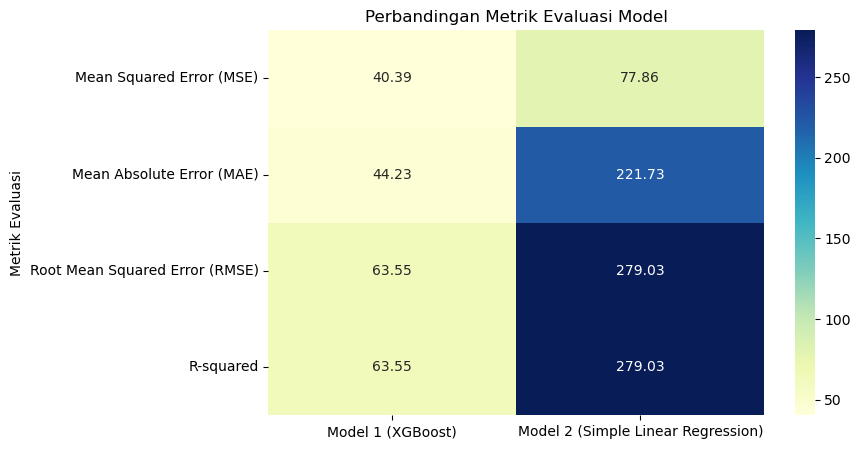

In [43]:
data_evaluasi = {
    "Metrik Evaluasi": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared"],
    "Model 1 (XGBoost)": [40.39, 44.23, 63.55, 63.55],
    "Model 2 (Simple Linear Regression)": [77.86, 221.73, 279.03, 279.03],
}

evaluation_df = pd.DataFrame(data_evaluasi).set_index("Metrik Evaluasi")

plt.figure(figsize=(8, 5))
sns.heatmap(evaluation_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Perbandingan Metrik Evaluasi Model")
plt.show()

# Menyimpan Model 

In [36]:
import pickle
# Save the model to a file
with open('model1.pkl', 'wb') as fileL:
    pickle.dump(xgb1c, fileL)

with open('model2.pkl', 'wb') as fileP:
    pickle.dump(xgb2c, fileP)

In [37]:
#Load the model from the file
with open('model1.pkl', 'rb') as fileL:
    loaded_model1 = pickle.load(fileL)

with open('model2.pkl', 'rb') as fileP:
    loaded_model2 = pickle.load(fileP)

# Inference

In [38]:
input = {
    'Jarak ke Ibu Kota Kabupaten (km)': [62, 51, 49, 30.56],
    'Jumlah Penduduk' : [5862, 3476, 901, 1956],
    'Kepadatan Penduduk': [120, 133, 257, 280],
    'Perempuan': [2869, 1567, 457, 1870],
    'Usia Lansia (60 ke atas)': [424, 172, 331, 329],
    'Usia Anak (0-14 tahun)': [1655, 876, 472, 568],
    'Ibu Hamil':[104, 150, 78, 96],
    'Tingkat Pendidikan (SMA/sederajat)': [374, 472, 146, 389],
    'Luas Wilayah (Ha)': [4820, 1805.0, 1325.0, 1435.0]
}

X_new = pd.DataFrame(input)

In [39]:
loaded_model1.predict(X_new)

array([1.3366413, 1.8483039, 5.587038 , 3.410098 ], dtype=float32)

In [40]:
loaded_model2.predict(X_new)

array([279.1616 , 116.05336, 179.56734, 228.47821], dtype=float32)